In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd
from utils import *
from sko.GA import GA_TSP
from sko.ACA import ACA_TSP
from sko.SA import SA_TSP
from sko.PSO import PSO
from utils import parse_UK_Data, generate_coordinates
from scipy import spatial
import matplotlib.pyplot as plt
import geoplot as gplt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt


In [3]:
# https://stackoverflow.com/questions/40536560/ipython-and-jupyter-autocomplete-not-working#40544668
api = "Tfmt6Sxyn-nfinSHUyUo3xmVDWdtwAUyh6C8Y3HTZhU"

dataset = "../datasets/UK50_1.txt"
meta_data, distance_data, station_data = parse_UK_Data(dataset)

#station_coordinates = generate_coordinates(station_data, to_csv=True, filename=dataset)
location_context = "United Kingdom"
#station_coordinates = generate_coordinates(station_data,location_context)
station_coordinates = pd.read_csv('../datasets/UK10_1_coordinates.csv', encoding='utf-8')
points_coordinate = station_coordinates[["lat", "long"]].to_numpy()

#UK = gpd.read_file("../datasets/united_kingdom_european_regions/Regions__December_2019__Boundaries_EN_BFC-shp/Regions__December_2019__Boundaries_EN_BFC.shp")
#dbf = gpd.GeoDataFrame.from_file(u"../datasets/united_kingdom_european_regions/european_region_region.dbf")
#dbf = dbf.to_crs("EPSG:4326")

In [4]:
meta_data["F-C Empty (l/100km)"] = 12.5
meta_data["F-C Full (l/100km)"] = 15 #= meta_data.append({"Fuel Consumption Empty":12.5,"Fuel Consumption Full":15},ignore_index=True) 
meta_data

,Customer Amount,Vehicle Curb Weight(kg),Max Load(kg),Minimum Speed(km/h),Maximum Speed(km/h),F-C Empty (l/100km),F-C Full (l/100km)
0,50,6350,3650,20,90,12.5,15


In [9]:
#station_coordinates = generate_coordinates(station_data,location_context=location_context, to_csv=True, filename=dataset)
#station_coordinates = generate_coordinates(station_data)
station_coordinates = pd.read_csv('../datasets/UK50_1_coordinates.csv', encoding='utf-8')
points_coordinate = station_coordinates[["lat", "lng"]].to_numpy()

[City:  Farnborough] [lat: 51.291869] [lng: -0.753984]: 100%|██████████| 51/51 [01:03<00:00,  1.24s/it]         


In [10]:
distance_matrix_here,_ = generate_large_distance_matrix(points_coordinate,api)

In [11]:
distance_matrix_here

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0,92554,111288,36039,128068,98432,132246,135438,102818,82694,...,142419,22300,19545,123434,89065,103808,89858,183142,28230,101205
1,91831,0,90102,64266,72919,31217,73317,144290,108291,13508,...,214325,69679,105788,132286,160971,106910,32902,136717,76585,110057
2,111595,82943,0,124825,21875,126251,26053,88467,33009,89469,...,145301,89443,125552,76463,127441,22278,47562,59970,114221,54234
3,35993,64225,123065,0,124156,70114,124554,147215,114595,54376,...,171689,39966,42594,135211,118335,115154,80427,194919,12997,112982
4,127797,70129,21291,124099,0,91050,8406,104669,41153,73341,...,161503,105645,141754,92665,143643,38480,40804,69906,136418,70436
5,100382,34242,111356,72817,94173,0,94571,152841,120221,24847,...,222876,78230,114339,140837,169522,128164,53056,157971,85136,118608
6,126384,71089,19878,128373,8502,95324,0,103256,39740,77615,...,160090,104232,140341,91252,142230,37067,36278,71328,140692,69023
7,135643,144421,87198,148873,103978,150299,108156,0,54940,134561,...,86304,113491,149600,15240,91232,79287,94102,107260,138269,41105
8,98656,107434,30908,111886,44531,113312,48709,54468,0,97574,...,131335,76504,112613,63524,114502,9332,34804,91921,101282,41295
9,82899,14031,91145,55334,73962,22352,74360,135358,98680,0,...,205393,60747,96856,123354,152039,107953,30944,137760,67653,101125


In [47]:
distance_matrix = make_open_problem(distance_matrix_here.to_numpy(),[0,6])

In [48]:
def cal_total_distance(routine):
    num_points, = routine.shape
    #print(num_points)
    return sum([distance_matrix[routine[i], routine[i + 1]]**2 for i in range(num_points-1)])

In [51]:
import sys
def start_constraint(routine):
    if routine[0] == 0:
        return -1
    return 1000000

# def has_two_vehicles(routine):
#     if

def constraint_capacity(routine):
    capacity = 0
    c = 0
    for i in routine:
        if i != 0:
            c += int(station_data.loc[i,"Demand(kg)"])
        else:
            capacity = max(capacity, c)
            c = 0
            
    capacity = max(capacity, c)
    return (capacity - int(meta_data.loc[0,"Max Load(kg)"])) * 1

In [52]:
ga = GA_TSP(func=cal_total_distance, n_dim=10,
              size_pop=200, max_iter=100,prob_mut=0.5)
# ga = ACA_TSP(func=cal_total_distance, n_dim=11,
#               size_pop=200, max_iter=200,
#               distance_matrix=distance_matrix)

num_vehicle = 2
ga.Chrom = np.concatenate([np.zeros(shape=(ga.size_pop, num_vehicle ), dtype=np.int), ga.Chrom+1], axis=1)
ga.has_constraint = True
ga.constraint_ueq = [start_constraint,constraint_capacity]

best_x, best_y = ga.run()
print(best_x)
print(best_y)

[ 0  1 10  2  6  9  3  0  5  4  8  7]
[61385741038]


In [53]:
np.zeros(shape=(ga.size_pop, num_vehicle ), dtype=np.int), ga.Chrom+1

(array([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        

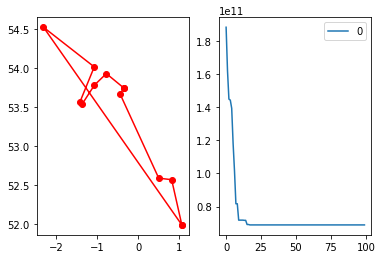

[ 7  8  4  5  0  0  1  3  6  9 10  2  7]


In [44]:
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_x, [best_x[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 1], best_points_coordinate[:, 0], 'o-r')
pd.DataFrame(ga.generation_best_Y).cummin().plot(ax=ax[1])
plt.show()
print(best_points_)

In [45]:
temp_split =  np.split(best_points_, np.where(best_points_== 0.)[0])
vehicle_routes_seperated = []
for v_route in temp_split:
    if v_route.size > 1:
        vehicle_routes_seperated.append(v_route)
vehicle_routes_seperated

[array([7, 8, 4, 5]), array([ 0,  1,  3,  6,  9, 10,  2,  7])]

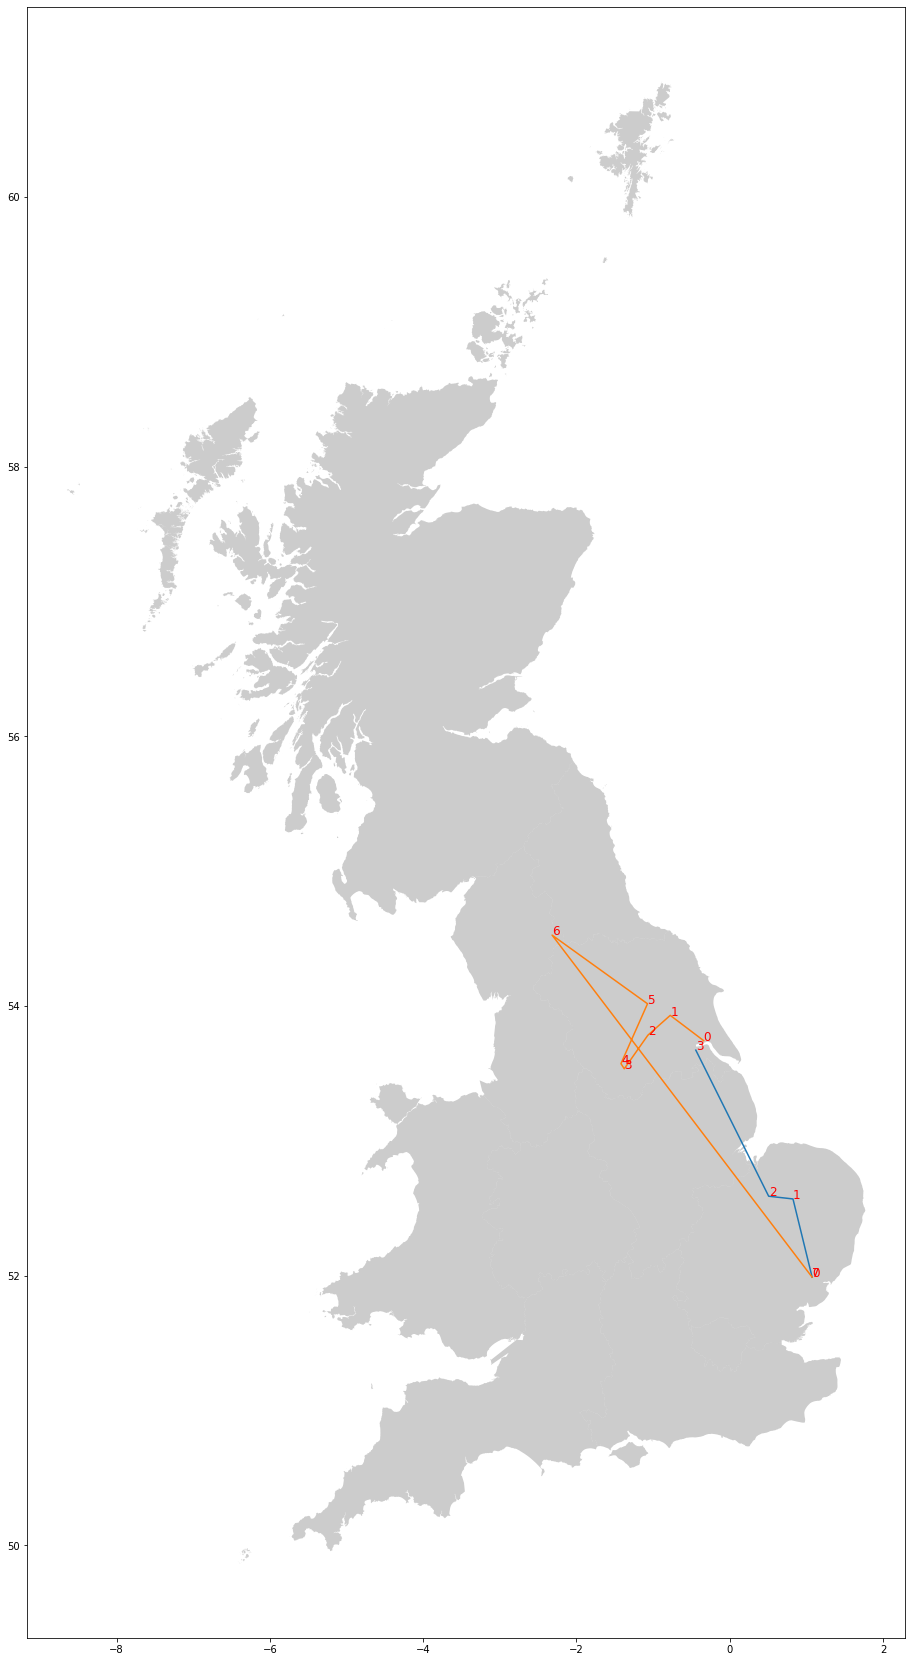

In [46]:
fig, ax = plt.subplots(figsize=(30,30))# add .shp mapfile to axes
dbf.plot(ax=ax, alpha=0.4,color="grey")

for vehicle_stops in vehicle_routes_seperated:
    vehicle_stops_coordinates=points_coordinate[vehicle_stops, :]
    ax.plot(vehicle_stops_coordinates[:, 1], vehicle_stops_coordinates[:, 0])
    for i, (x, y) in enumerate(zip(vehicle_stops_coordinates[:, 1], vehicle_stops_coordinates[:, 0])):
        ax.text(x, y, str(i), color="red", fontsize=12)
